In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import hog
import matplotlib.image as mpimg
import random

In [2]:
from util import *

# Data

In [3]:
data_dir = 'data'

## Project Video 

In [4]:
output_dir = 'output_images' 
project_video_file = 'project_video.mp4'

In [5]:
extract_video_imgs(project_video_file, output_dir)

100%|██████████| 1259/1259 [01:10<00:00, 17.86it/s]


In [6]:
project_img_files = sorted(glob.glob('%s/*.jpg' % output_dir))[:10]
sample_project_imgs = read_imgs(project_img_files, scale_to_255=False)

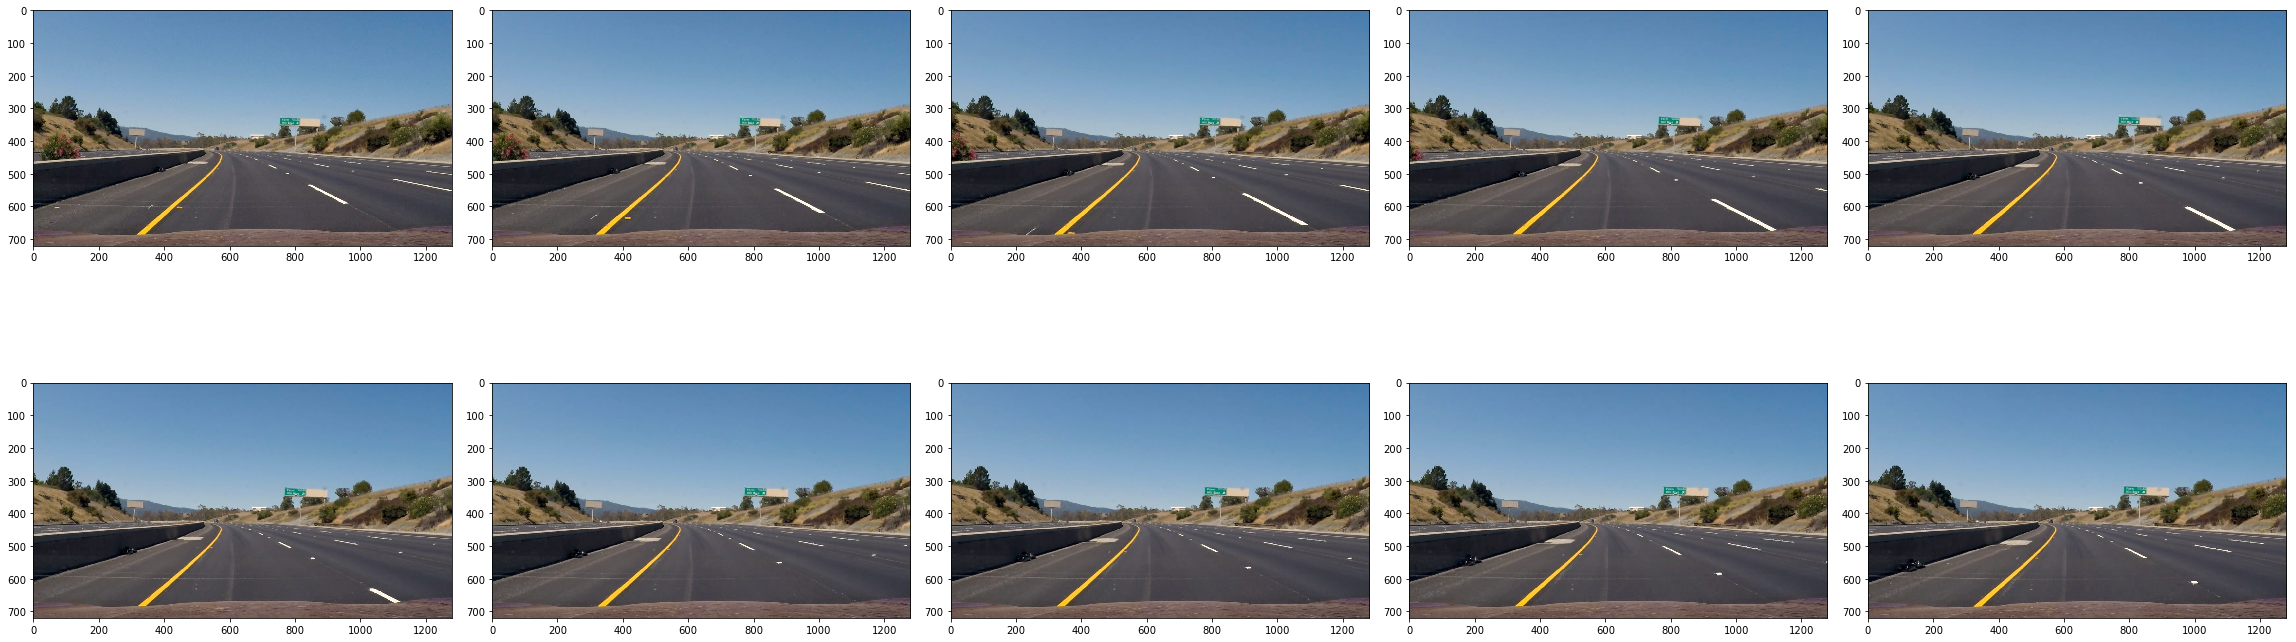

In [7]:
display_images(sample_project_imgs, figsize=(32,16))

In [8]:
sample_project_imgs.min(), sample_project_imgs.max()

(0, 255)

## Test Video

In [9]:
test_output_dir = 'test_images2' 
test_video_file = 'test_video.mp4'

In [10]:
extract_video_imgs(test_video_file, test_output_dir)

100%|██████████| 37/37 [00:02<00:00, 16.96it/s]


In [11]:
test_img_files = sorted(glob.glob('%s/*.jpg' % test_output_dir))[:10]
sample_test_imgs = read_imgs(test_img_files, scale_to_255=False)

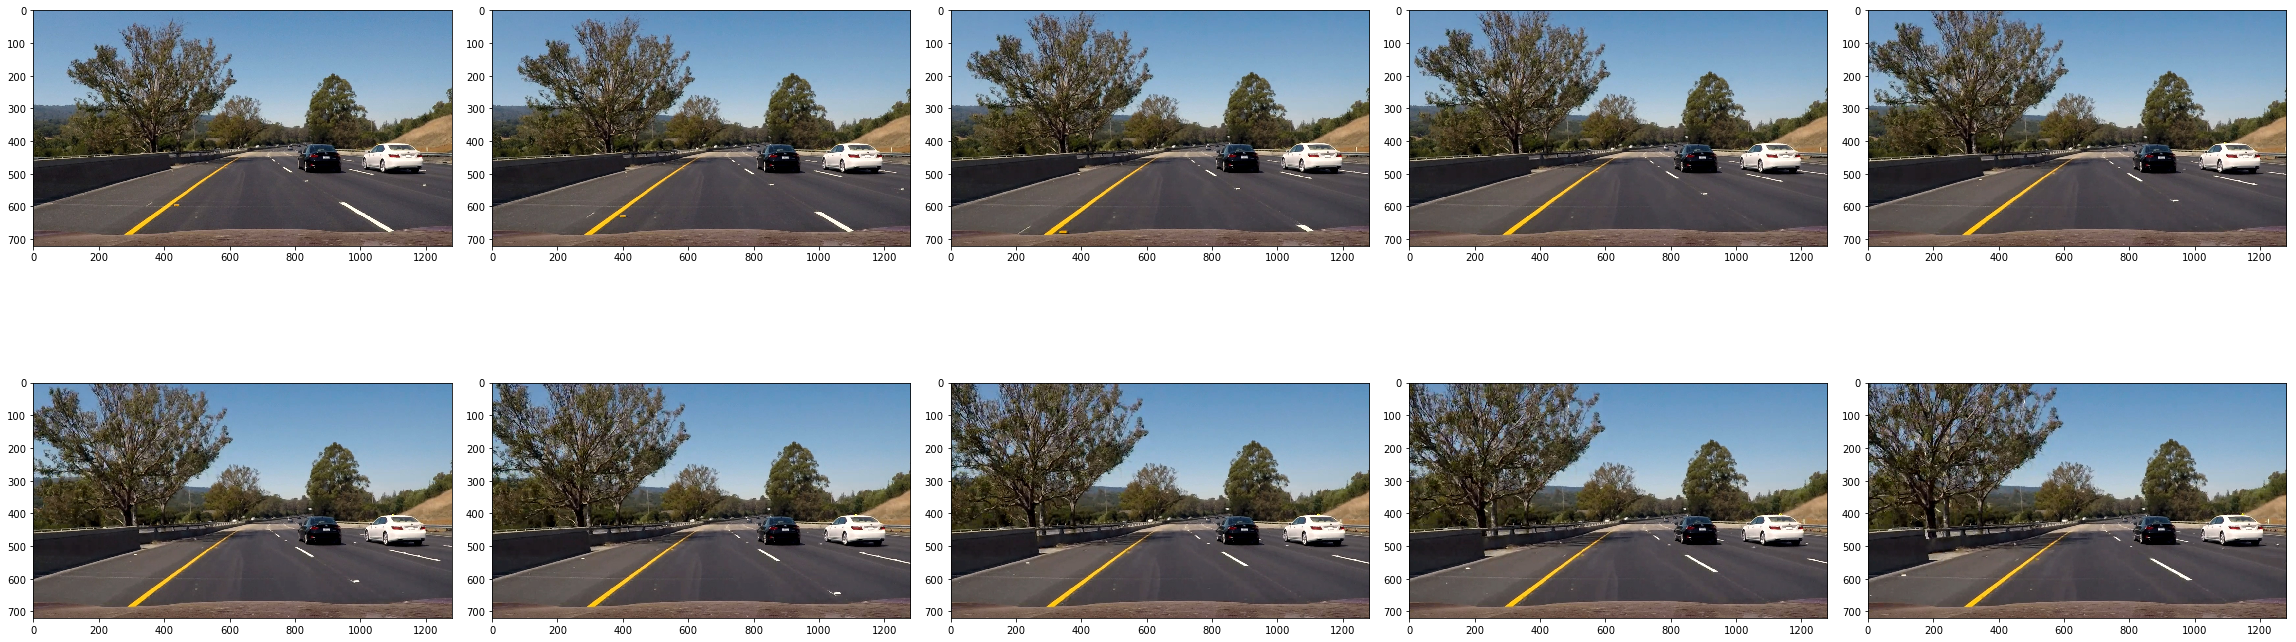

In [12]:
display_images(sample_test_imgs, figsize=(32,16))

In [13]:
sample_test_imgs.min(), sample_test_imgs.max()

(0, 255)

## Non-vehicle

### Extras

In [14]:
non_vehicle_dir = '%s/non-vehicles' % data_dir

In [15]:
non_vehicle_extra_dir = '%s/Extras' % non_vehicle_dir
non_vehicle_extra_img_files = sorted(glob.glob('%s/*.png' % non_vehicle_extra_dir))[:10]
sample_non_vehicle_extra_imgs = read_imgs(non_vehicle_extra_img_files, scale_to_255=True)

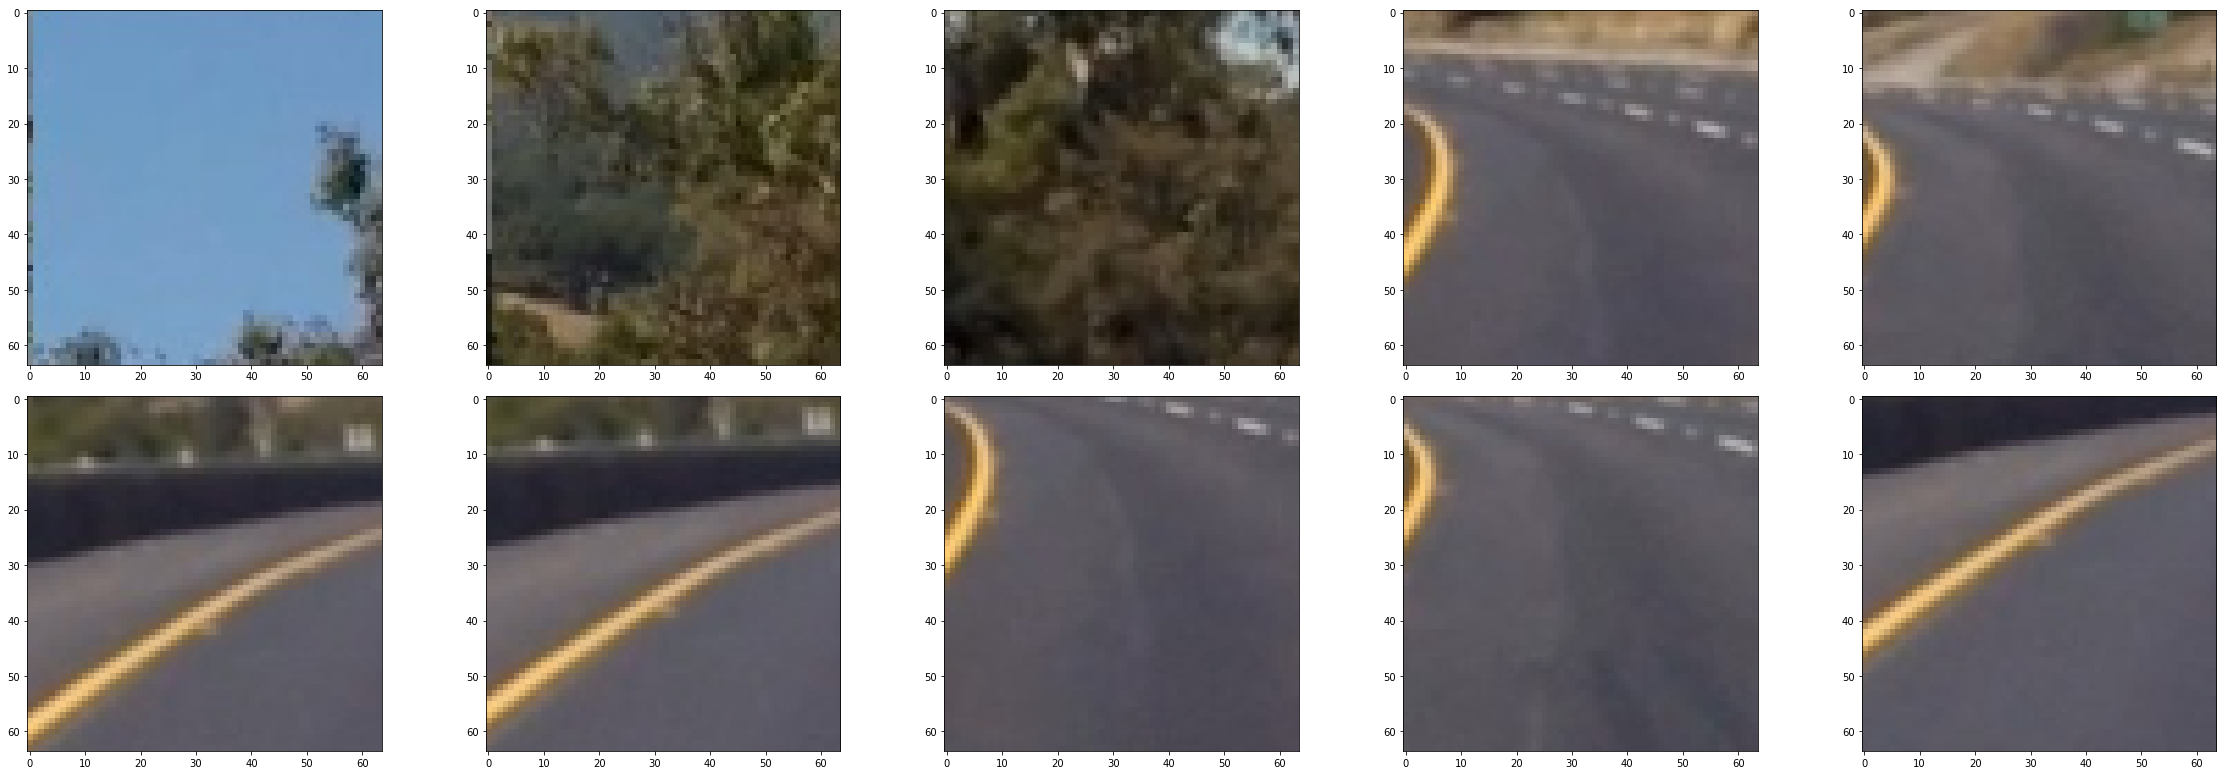

In [16]:
display_images(sample_non_vehicle_extra_imgs, figsize=(32,16))

In [17]:
sample_non_vehicle_extra_imgs[0].min(), sample_non_vehicle_extra_imgs[0].max()

(4, 207)

### GTI

In [18]:
non_vehicle_gti_dir = '%s/GTI' % non_vehicle_dir
non_vehicle_gti_img_files = sorted(glob.glob('%s/*.png' % non_vehicle_gti_dir))[:10]
sample_non_vehicle_gti_imgs = read_imgs(non_vehicle_gti_img_files, scale_to_255=True)

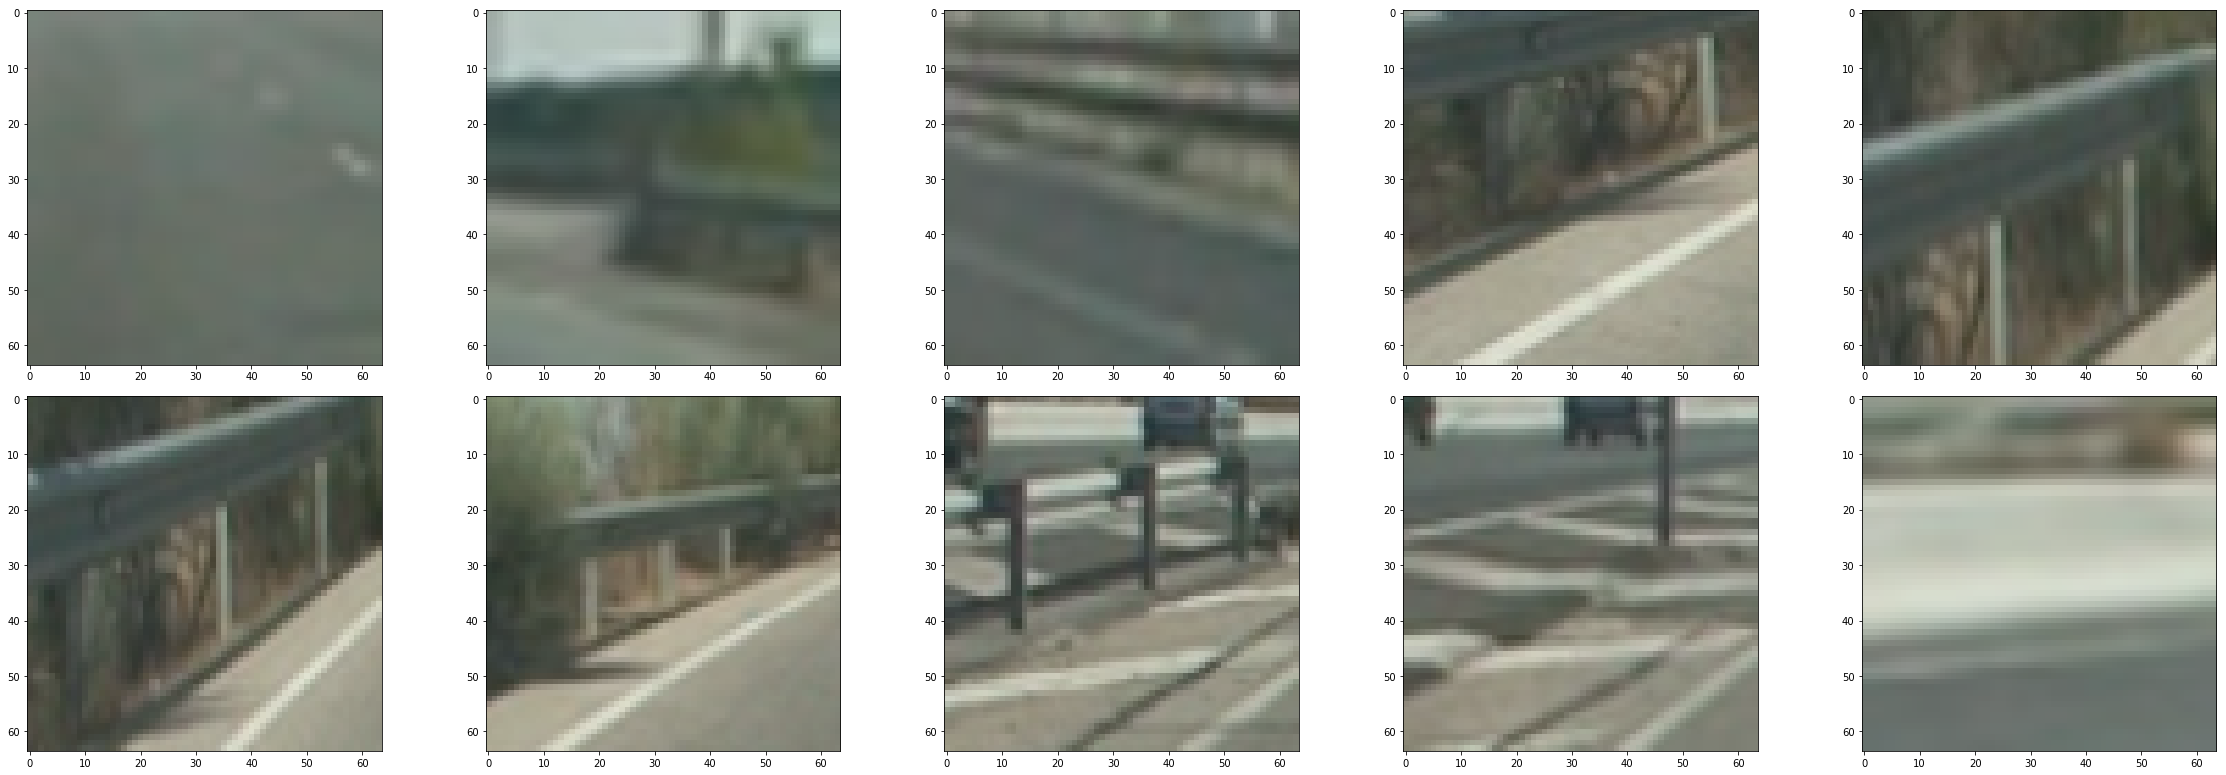

In [19]:
display_images(sample_non_vehicle_gti_imgs, figsize=(32,16))

In [20]:
sample_non_vehicle_extra_imgs[0].min(), sample_non_vehicle_extra_imgs[0].max()

(4, 207)

## Vehicle

In [21]:
vehicle_dir = '%s/vehicles' % data_dir

### GTI Far

In [22]:
vehicle_gti_far_dir = '%s/GTI_Far' % vehicle_dir
vehicle_gti_far_img_files = sorted(glob.glob('%s/*.png' % vehicle_gti_far_dir))[:10]
sample_vehicle_gti_far_imgs = read_imgs(vehicle_gti_far_img_files, scale_to_255=True)

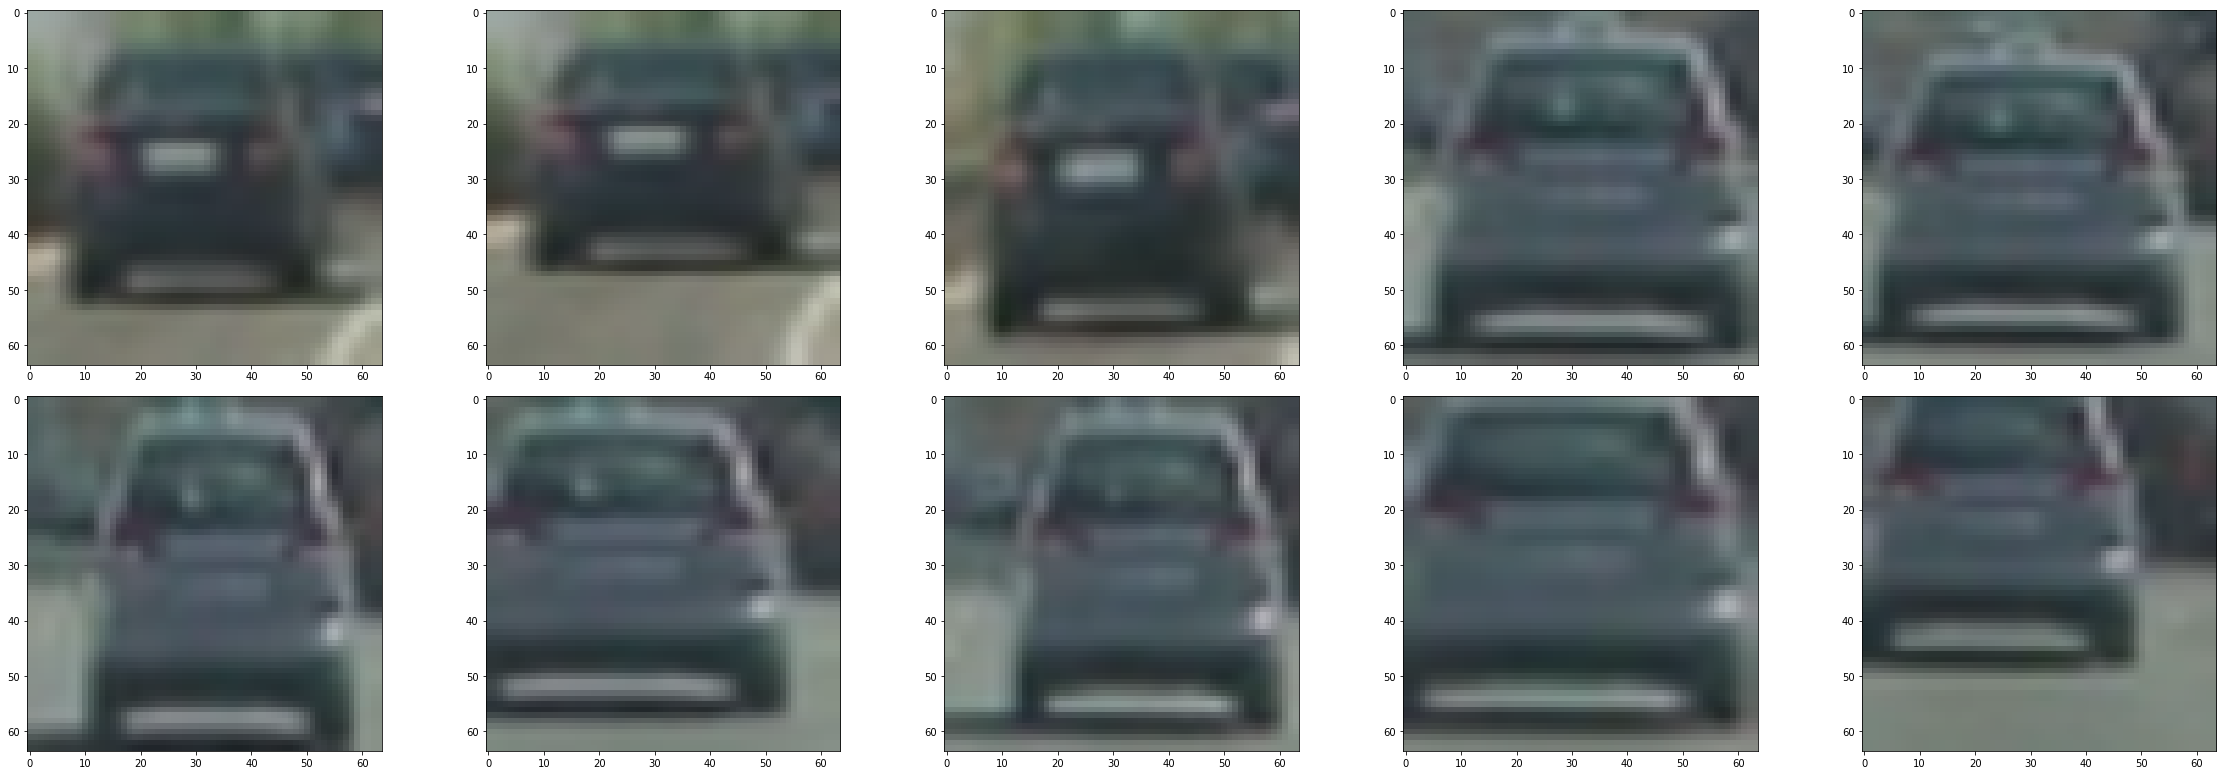

In [23]:
display_images(sample_vehicle_gti_far_imgs, figsize=(32,16))

In [24]:
sample_vehicle_gti_far_imgs[0].min(), sample_vehicle_gti_far_imgs[0].max()

(33, 192)

### GTI Left

In [25]:
vehicle_gti_left_dir = '%s/GTI_Left' % vehicle_dir
vehicle_gti_left_img_files = sorted(glob.glob('%s/*.png' % vehicle_gti_left_dir))[:10]
sample_vehicle_gti_left_imgs = read_imgs(vehicle_gti_left_img_files, scale_to_255=True)

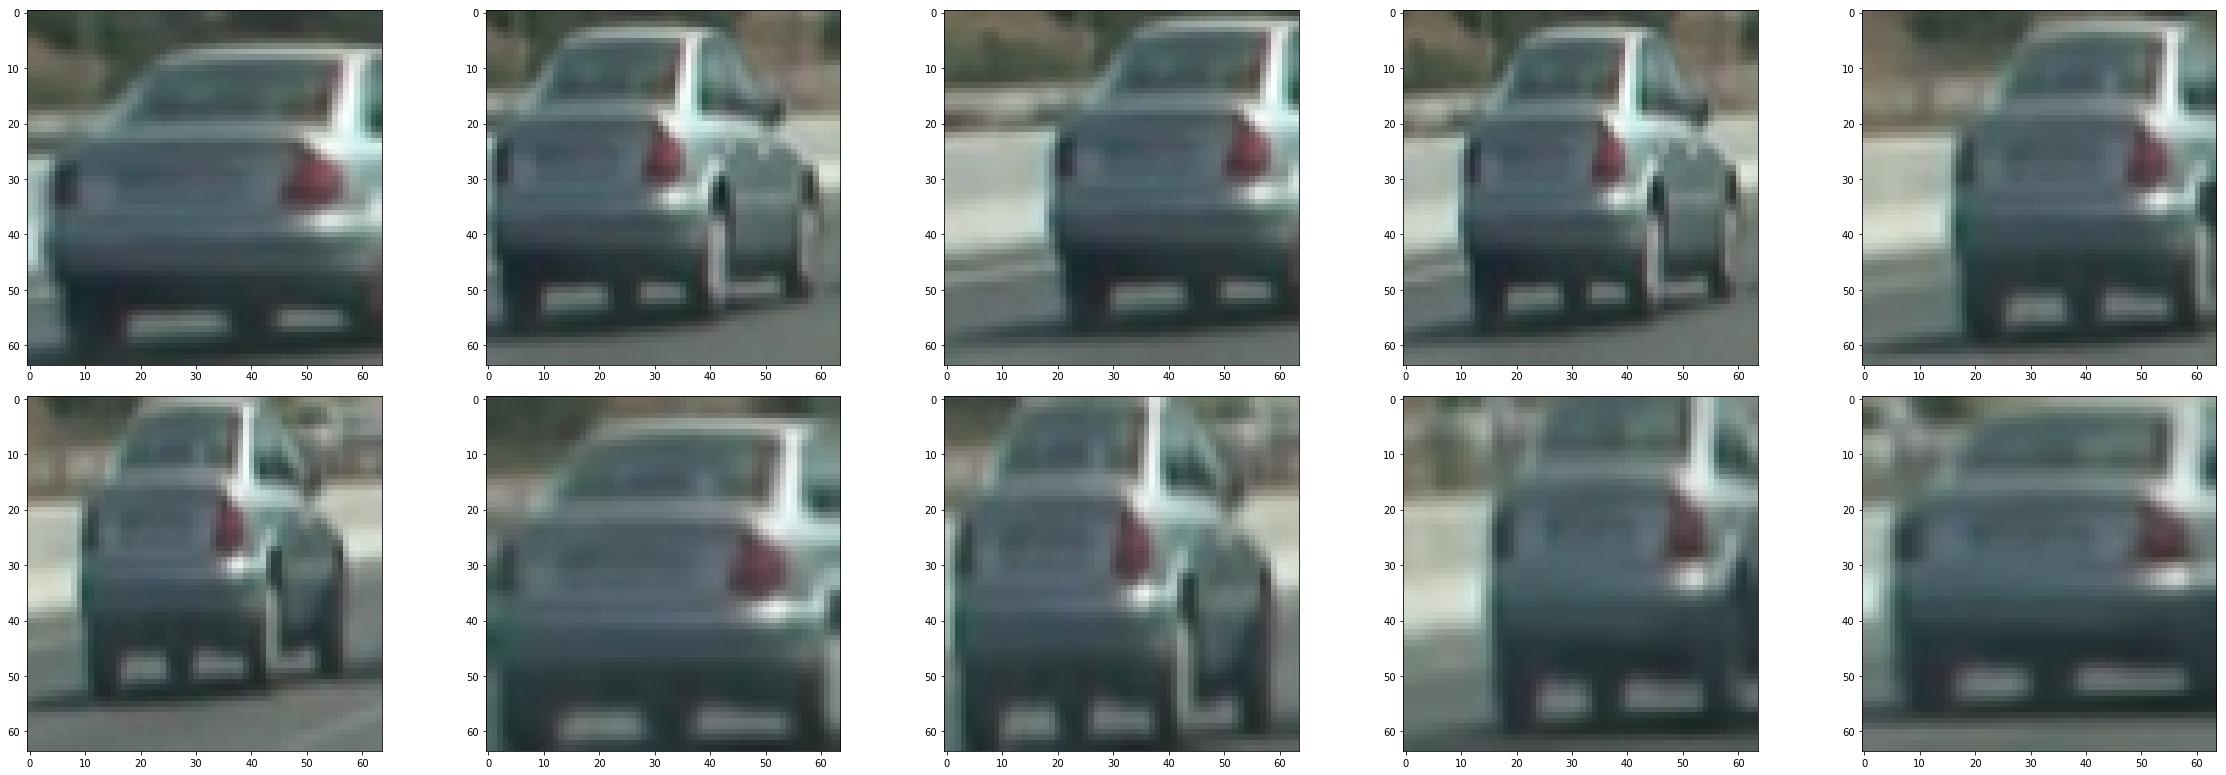

In [26]:
display_images(sample_vehicle_gti_left_imgs, figsize=(32,16))

In [27]:
sample_vehicle_gti_left_imgs[0].min(), sample_vehicle_gti_left_imgs[0].max()

(18, 255)

### GTI Middle Close

In [28]:
vehicle_gti_middle_close_dir = '%s/GTI_MiddleClose' % vehicle_dir
vehicle_gti_middle_close_img_files = sorted(glob.glob('%s/*.png' % 
                                                      vehicle_gti_middle_close_dir))[:10]
sample_vehicle_gti_middle_close_imgs = read_imgs(vehicle_gti_middle_close_img_files, 
                                                 scale_to_255=True)

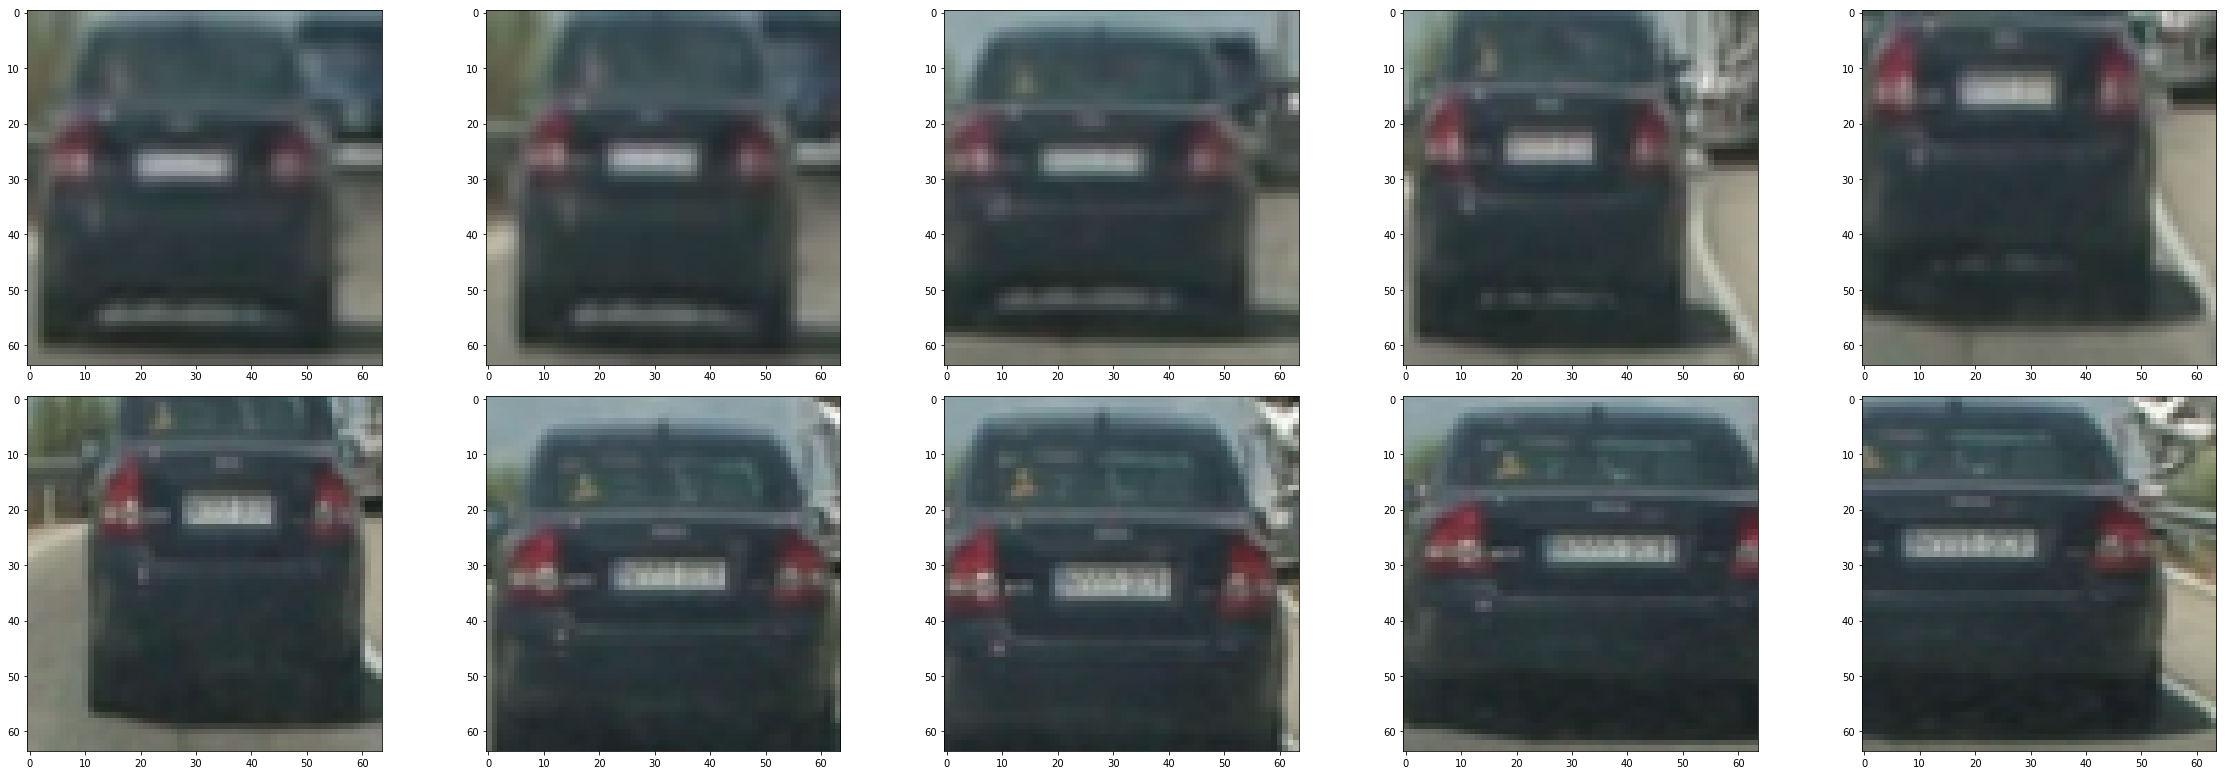

In [29]:
display_images(sample_vehicle_gti_middle_close_imgs, figsize=(32,16))

In [30]:
sample_vehicle_gti_middle_close_imgs[0].min(), sample_vehicle_gti_middle_close_imgs[0].max()

(29, 177)

### GTI Right

In [31]:
vehicle_gti_right_dir = '%s/GTI_Right' % vehicle_dir
vehicle_gti_right_img_files = sorted(glob.glob('%s/*.png' % vehicle_gti_right_dir))[:10]
sample_vehicle_gti_right_imgs = read_imgs(vehicle_gti_right_img_files, scale_to_255=True)

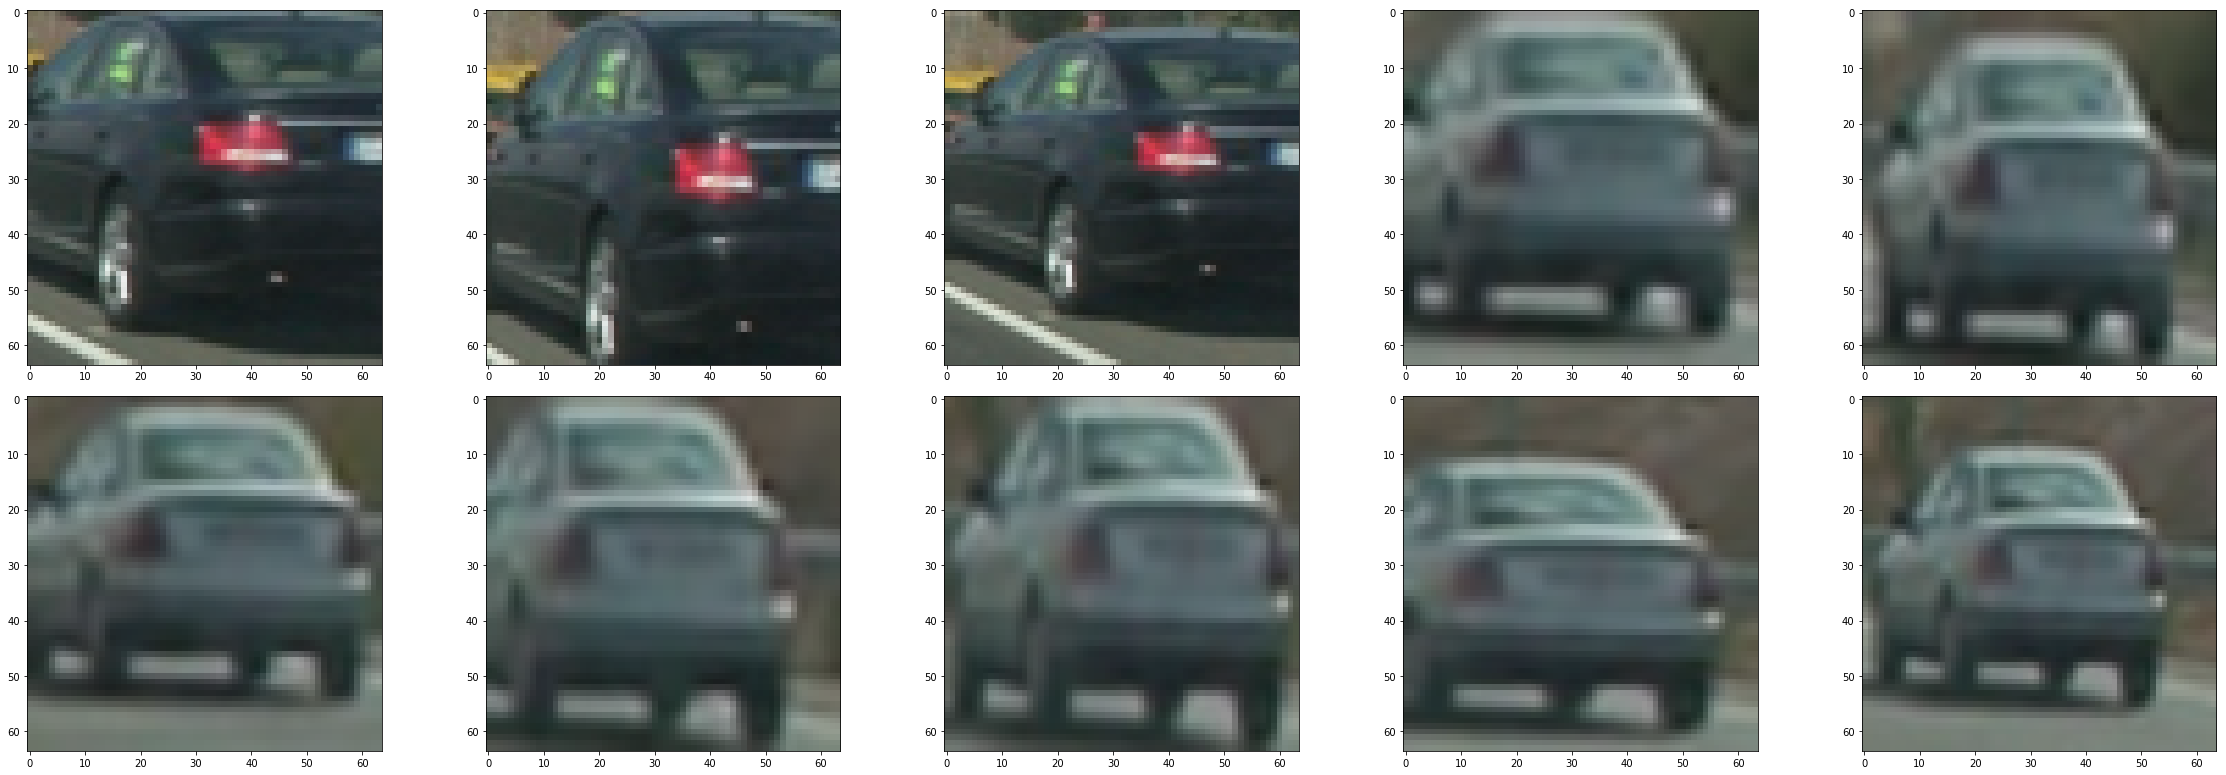

In [32]:
display_images(sample_vehicle_gti_right_imgs, figsize=(32,16))

In [33]:
sample_vehicle_gti_right_imgs[0].min(), sample_vehicle_gti_right_imgs[0].max()

(16, 238)

### KITTI extracted

In [34]:
vehicle_kitti_extracted_dir = '%s/KITTI_extracted' % vehicle_dir
vehicle_kitti_extracted_img_files = sorted(glob.glob('%s/*.png' 
                                                     % vehicle_kitti_extracted_dir))[:10]
vehicle_kitti_extracted_imgs = read_imgs(vehicle_kitti_extracted_img_files, scale_to_255=True)

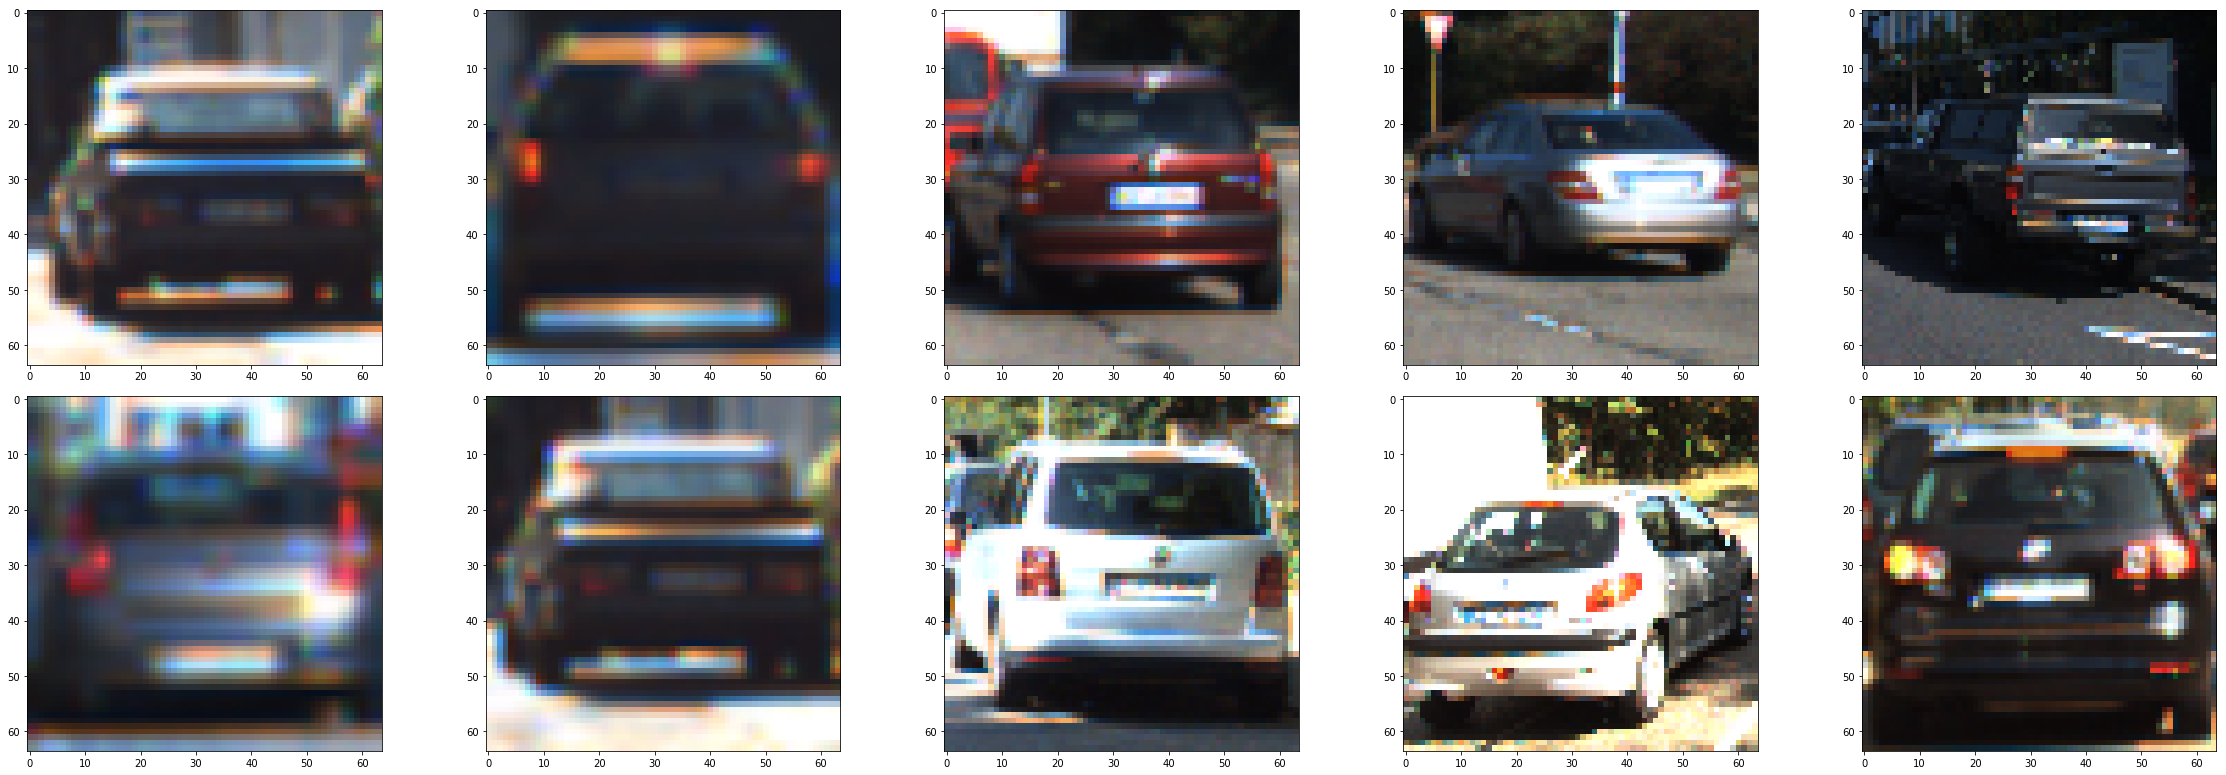

In [35]:
display_images(vehicle_kitti_extracted_imgs, figsize=(32,16))

In [36]:
vehicle_kitti_extracted_imgs[0].min(), vehicle_kitti_extracted_imgs[0].max()

(14, 255)

## Vehicle/Not Vehicle

### Vehicle

In [37]:
vehicle_dir = '%s/vehicles' % data_dir
vehicle_img_files = sorted(glob.glob('%s/*/*.png' % vehicle_dir))
vehicle_imgs = read_imgs(vehicle_img_files, scale_to_255=True)

In [38]:
len(vehicle_imgs)

8792

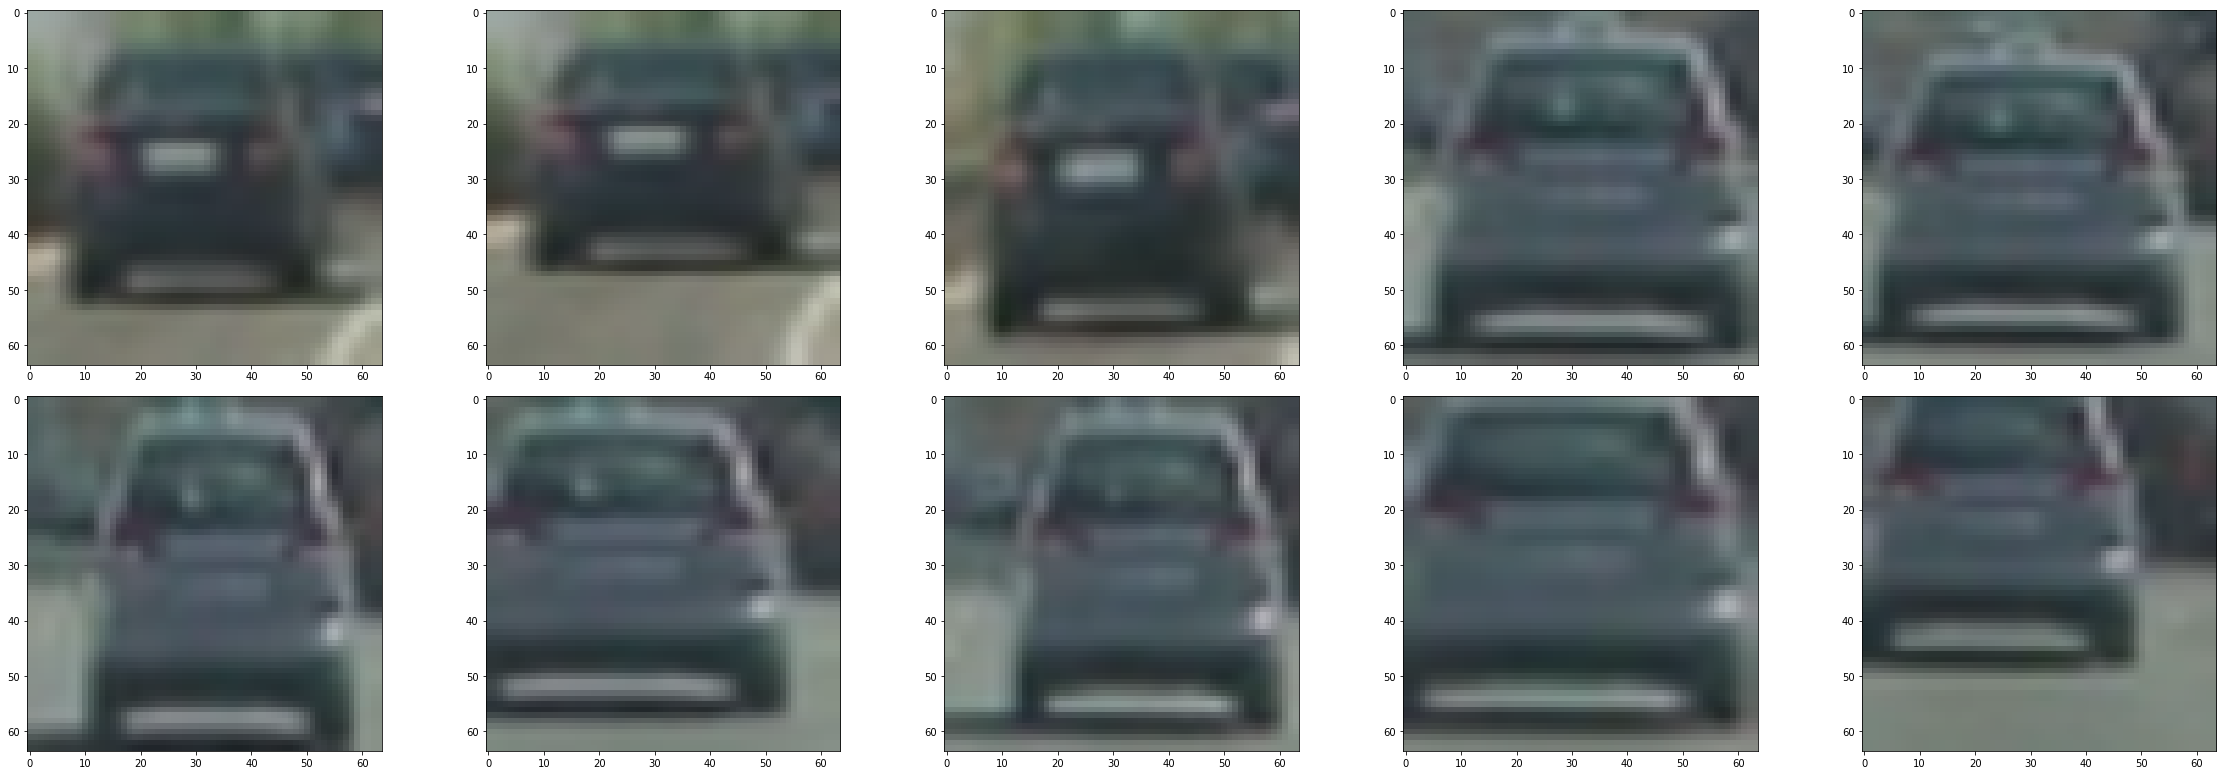

In [39]:
display_images(vehicle_imgs[:10], figsize=(32,16))

In [40]:
vehicle_imgs[0].min(), vehicle_imgs[0].max()

(33, 192)

### Non-Vehicle

In [41]:
non_vehicle_dir = '%s/non-vehicles' % data_dir
non_vehicle_img_files = sorted(glob.glob('%s/*/*.png' % non_vehicle_dir))
non_vehicle_imgs = read_imgs(non_vehicle_img_files, scale_to_255=True)

In [42]:
len(non_vehicle_imgs)

8968

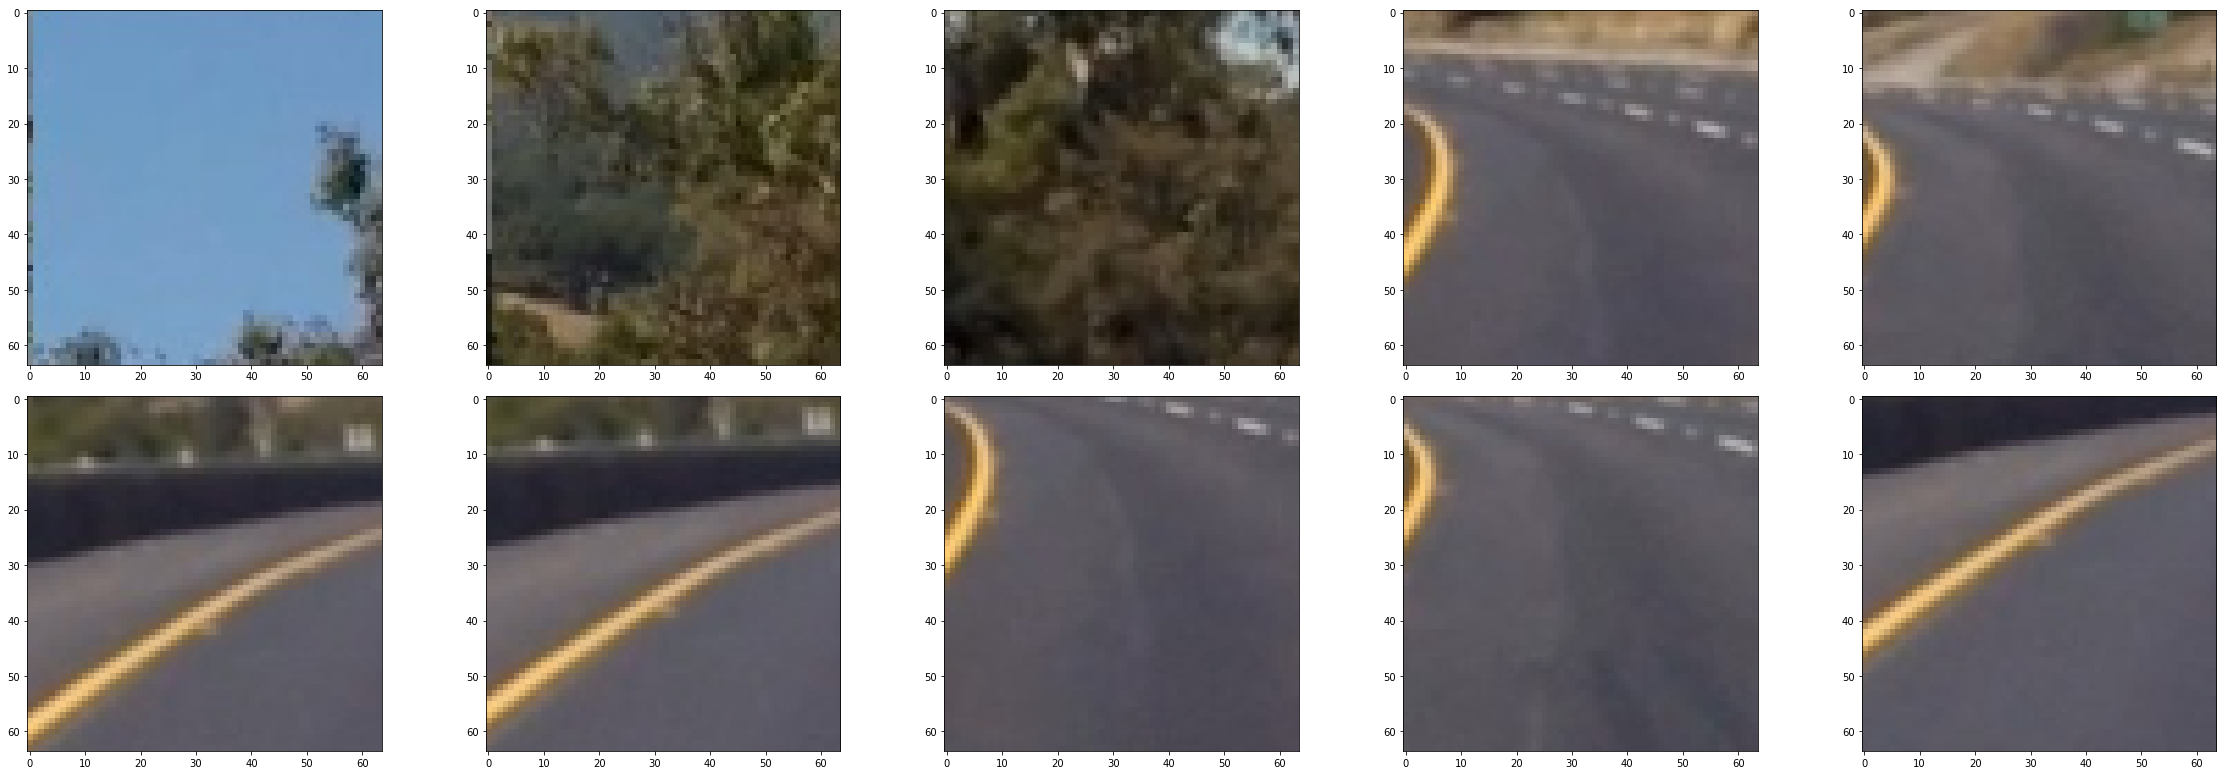

In [43]:
display_images(non_vehicle_imgs[:10], figsize=(32,16))

In [44]:
non_vehicle_imgs[0].min(), non_vehicle_imgs[0].max()

(4, 207)

## Train, Val, Test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_img_files = vehicle_img_files + non_vehicle_img_files
y = [1.0]*len(vehicle_img_files) + [0.0]*len(non_vehicle_img_files)

In [47]:
X_train_imgs_filename = '%s/X_train_imgs.csv' % data_dir
X_val_imgs_filename = '%s/X_val_imgs.csv' % data_dir
X_test_imgs_filename = '%s/X_test_imgs.csv' % data_dir
y_train_filename = '%s/y_train.csv' % data_dir
y_val_filename = '%s/y_val.csv' % data_dir
y_test_filename = '%s/y_test.csv' % data_dir

In [48]:
if not do_files_exists([X_train_imgs_filename, X_val_imgs_filename, X_test_imgs_filename, 
                       y_train_filename, y_val_filename, y_test_filename]):
    X_train_img_files, X_test_img_files, y_train, y_test = train_test_split(X_img_files, y, test_size=0.3, 
                                                                            random_state=5150)
    X_val_img_files, X_test_img_files, y_val, y_test = train_test_split(X_test_img_files, y_test, test_size=0.33,
                                                                    random_state=5150)
    assert len(X_train_img_files) + len(X_val_img_files) + len(X_test_img_files) == len(X_img_files)
    assert len(y_train) + len(y_val) + len(y_test) == len(y)    
    
    save_img_file_csv(X_train_img_files, X_train_imgs_filename)
    save_img_file_csv(X_val_img_files, X_val_imgs_filename)
    save_img_file_csv(X_test_img_files, X_test_imgs_filename)
    save_label_file_csv(y_train, y_train_filename)
    save_label_file_csv(y_val, y_val_filename)
    save_label_file_csv(y_test, y_test_filename)
else:
    X_train_img_files = read_img_file_csv(X_train_imgs_filename)
    X_val_img_files = read_img_file_csv(X_val_imgs_filename)
    X_test_img_files = read_img_file_csv(X_test_imgs_filename)
    y_train = read_label_file_csv(y_train_filename)
    y_val = read_label_file_csv(y_val_filename)
    y_test = read_label_file_csv(y_test_filename)

In [49]:
X_train_vehicle_files = []
X_train_nonvehicle_files = []

for i, curr_y in enumerate(y_train):
    if curr_y == 0.0:
        X_train_nonvehicle_files.append(X_train_img_files[i])
    else:
        X_train_vehicle_files.append(X_train_img_files[i])

In [50]:
len(X_train_nonvehicle_files), len(X_train_vehicle_files)

(6251, 6181)

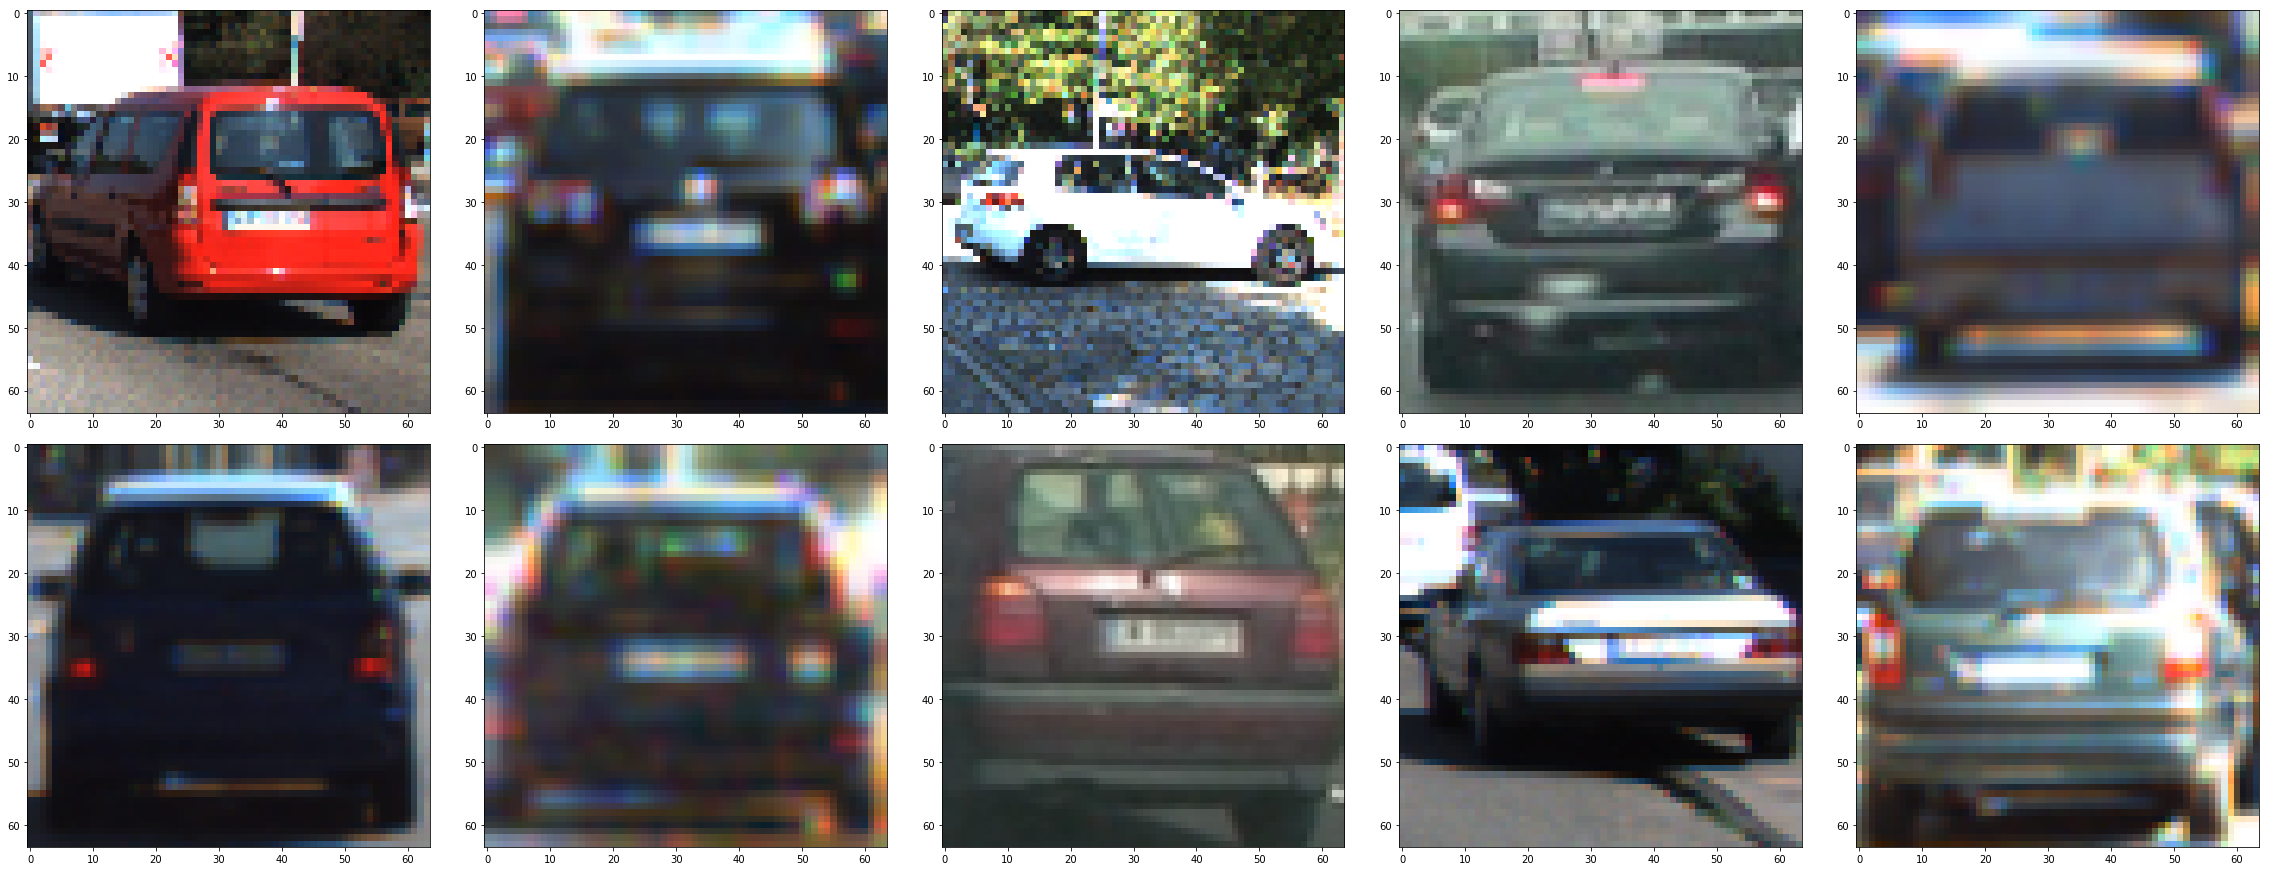

In [51]:
display_images(X_train_vehicle_files, start_idx=0, end_idx=10,  step_val=1,
                   columns = 5, use_gray=False,
                   apply_fnc=lambda x: read_img(x, scale_to_255=True), figsize=(32,18))

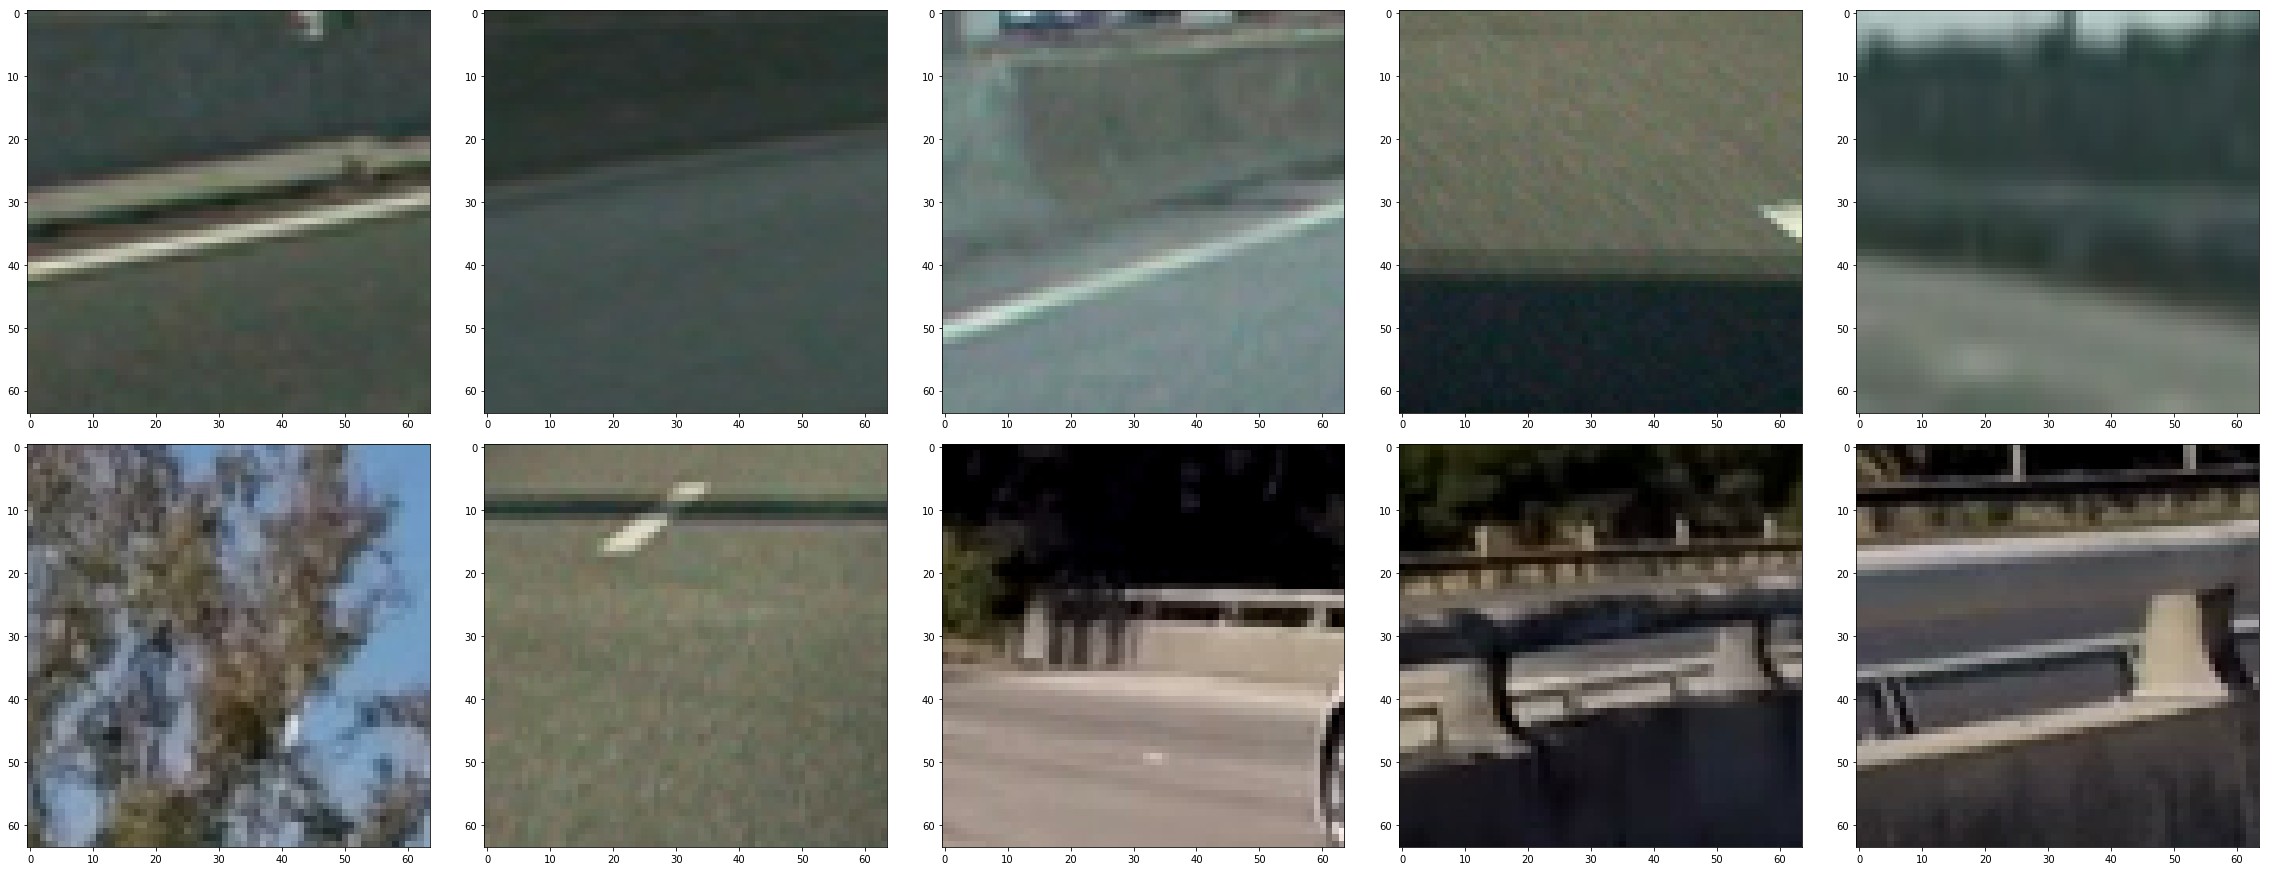

In [52]:
display_images(X_train_nonvehicle_files, start_idx=0, end_idx=10,  step_val=1,
                   columns = 5, use_gray=False,
                   apply_fnc=lambda x: read_img(x, scale_to_255=True), figsize=(32,18))

# Color Histogram

In [53]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

In [54]:
img = read_img(X_train_vehicle_files[0], scale_to_255=True)

In [55]:
rh, gh, bh, bincen, feature_vec = color_hist(img, nbins=32, bins_range=(0, 256))

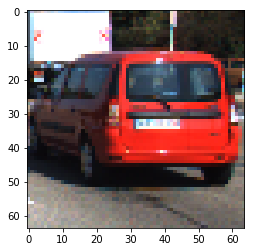

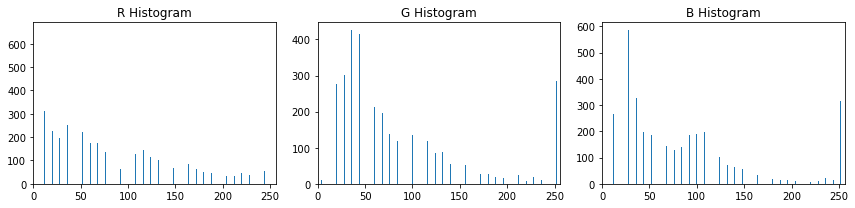

In [56]:
# Plot a figure with all three bar charts
if rh is not None:
    plt.imshow(img)
    plt.show()
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
    plt.show()
else:
    print('Your function is returning None for at least one variable...')

# Color Spaces

In [57]:
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

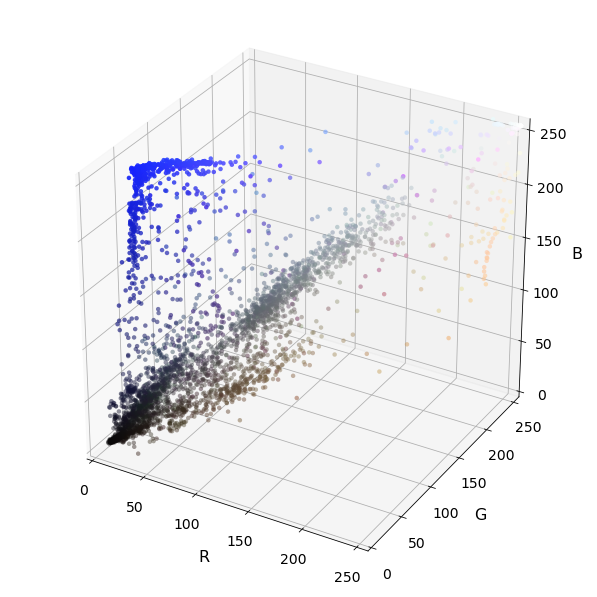

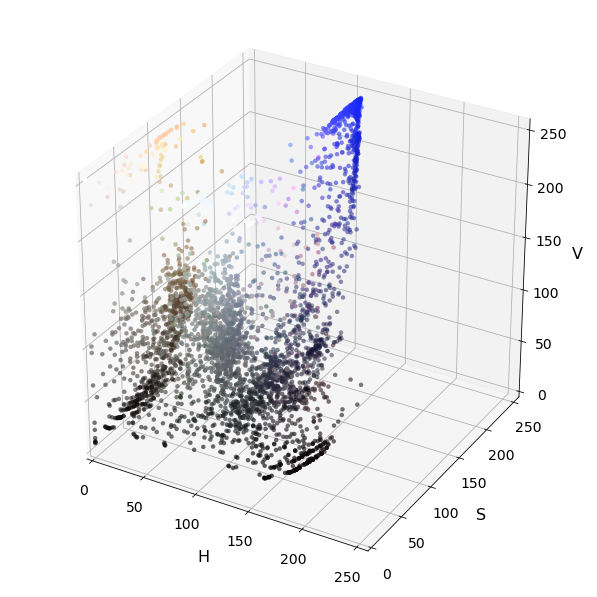

In [58]:
# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

In [59]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)    
        
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    
    # Return the feature vector
    return features

# HOG

In [60]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=True, 
                     feature_vec=True):
                         
    hog_features, hog_image = hog(img, orientations=orient,
                                    pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                    cells_per_block=(cell_per_block, cell_per_block), 
                                    visualise=vis, feature_vector=feature_vec,
                                    block_norm="L2-Hys")
                                    
    if vis:
        return hog_features, hog_image
    else:
        return hog_features

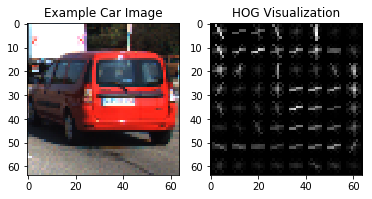

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
def make_scalers(img_files, cspace='RGB', spatial_size=(32, 32), 
                 hist_bins=32, hist_range=(0, 256), scale_to_255=True):
    spatial_feature_arr = []
    hist_feature_arrs = []
    
    for img_file in tqdm(img_files):
        img = read_img(img_file, scale_to_255=scale_to_255)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: 
            feature_img = np.copy(img) 
            
        spatial_features = bin_spatial(feature_img, size=spatial_size)
        spatial_feature_arr.append(spatial_features)
        _, _, _, _, hist_feature_arr = color_hist(feature_img, nbins=hist_bins, bins_range=hist_range)
        hist_feature_arrs.append(hist_feature_arr)
            
    spatial_feature_scaler = StandardScaler()
    hist_feature_scaler = StandardScaler()
    
    spatial_feature_scaler.fit(np.array(spatial_feature_arr).reshape((-1,1)))
    hist_feature_scaler.fit(np.array(hist_feature_arrs).reshape((-1,1)))
    
    return spatial_feature_scaler, hist_feature_scaler

In [64]:
spatial_feature_scaler, hist_feature_scaler = make_scalers(X_train_img_files)

100%|██████████| 12432/12432 [01:13<00:00, 168.66it/s]
/Users/phillipcchin/anaconda3/envs/p3tf15/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/phillipcchin/anaconda3/envs/p3tf15/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [65]:
img = read_img(X_train_img_files[1], scale_to_255=True)
feature_img = np.copy(img) 

spatial_size=(32, 32)
spatial_features = bin_spatial(feature_img, size=spatial_size)

hist_bins=32
hist_range=(0, 256)
_, _, _, _, hist_feature_arr = color_hist(feature_img, nbins=hist_bins, bins_range=hist_range)

In [66]:
spatial_feature_scaler.mean_

array([ 80.47089825])

In [67]:
hist_feature_scaler.mean_

array([ 128.])

In [68]:
spatial_features.min(), spatial_features.max()

(35, 89)

In [69]:
scaled_spatial_features = spatial_feature_scaler.transform([spatial_features])
scaled_spatial_features.min(), scaled_spatial_features.max()

(-0.84194093672242443, 0.15792518279142001)

In [70]:
spatial_features.shape, scaled_spatial_features[0].shape

((3072,), (3072,))

In [71]:
hist_feature_arr.min(), hist_feature_arr.max()

(0, 1840)

In [72]:
hist_feature_arr_features = hist_feature_scaler.transform([hist_feature_arr])
hist_feature_arr_features.min(), hist_feature_arr_features.max()

(-0.52975019624689079, 7.0854088748021642)

In [73]:
def extract_features(img_files, spatial_feature_scaler, hist_feature_scaler,
                     cspace='RGB', spatial_size=(32, 32), 
                     hist_bins=32, hist_range=(0, 256), scale_to_255=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for img_file in tqdm(img_files):
        img = read_img(img_file, scale_to_255=scale_to_255)
        
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        else: 
            feature_image = np.copy(image)  
            
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        spatial_features = spatial_feature_scaler.transform([spatial_features])[0]
        
        # Apply color_hist() also with a color space option now
        _, _, _, _, hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        hist_features = hist_feature_scaler.transform([hist_features])[0]
        
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
        #print("###features", features.shape, features.dtype)
        
    # Return list of feature vectors
    
    return features

In [74]:
X_train = extract_features(X_train_img_files, spatial_feature_scaler, hist_feature_scaler, cspace='HLS', 
                           spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), scale_to_255=True)

100%|██████████| 12432/12432 [01:19<00:00, 156.01it/s]


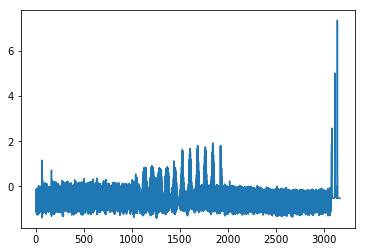

In [75]:
plt.plot(X_train[0])
plt.show()

# Train 

## SVM

In [76]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [77]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, verbose=2)

In [79]:
X_train_img_files, y_train = shuffle_train_data(X_train_img_files, y_train)

In [80]:
y_train[:10]

[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]

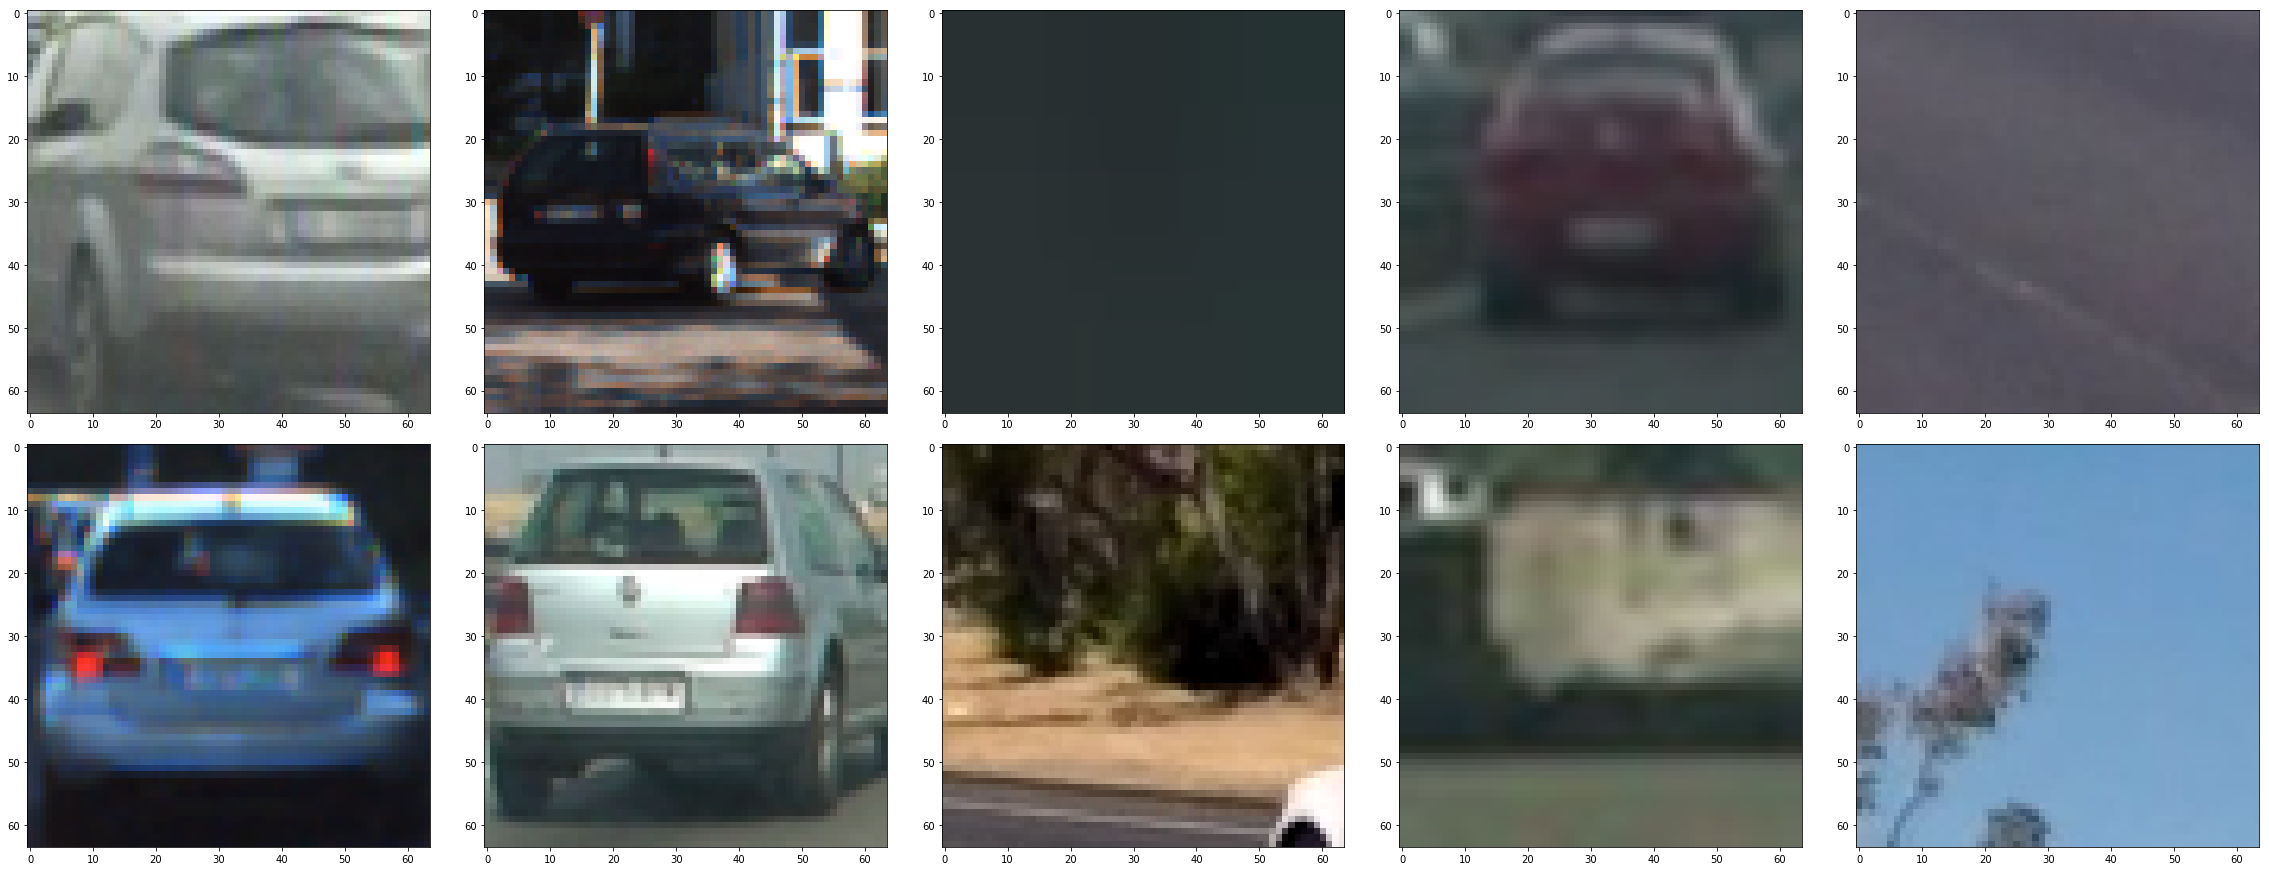

In [81]:
display_images(X_train_img_files, start_idx=0, end_idx=10,  step_val=1,
                   columns = 5, use_gray=False,
                   apply_fnc=lambda x: read_img(x, scale_to_255=True), figsize=(32,18))

In [82]:
X_train = extract_features(X_train_img_files, spatial_feature_scaler, hist_feature_scaler, cspace='HLS', 
                           spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), scale_to_255=True)

100%|██████████| 12432/12432 [01:16<00:00, 163.33it/s]


In [83]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 1.5min
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total= 1.1min
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 1.3min
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total= 1.7min
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total= 1.7min
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total= 1.7min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.3min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.2min
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 26.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [84]:
X_val = extract_features(X_val_img_files, spatial_feature_scaler, hist_feature_scaler, cspace='HLS', 
                         spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), scale_to_255=True)

100%|██████████| 3569/3569 [00:28<00:00, 124.73it/s]


In [85]:
X_test = extract_features(X_test_img_files, spatial_feature_scaler, hist_feature_scaler, cspace='HLS', 
                          spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), scale_to_255=True)

100%|██████████| 1759/1759 [00:12<00:00, 135.53it/s]


In [86]:
type(X_test), type(y_test)

(list, list)

In [87]:
clf.score(X_test, y_test)

0.99260943718021599